## 1102_DS_Lab7
## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = a + bx
$$
where $b$ is commonly known as the *slope*, and $a$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

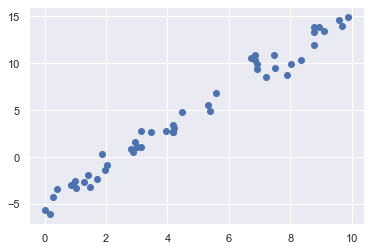

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

In [3]:
x[:,np.newaxis].shape

(50, 1)

In [4]:
from sklearn.datasets import make_regression
XX, yy = make_regression(n_samples=1000, n_features=3)

In [5]:
XX.shape

(1000, 3)

In [7]:
XX

array([[ 0.68866322, -0.42802116,  0.26813583],
       [ 0.38586265,  0.4187703 ,  1.67319172],
       [-1.69064049, -0.27712394,  0.48643382],
       ...,
       [ 1.72891551, -0.46102518,  0.89753364],
       [-2.5337812 , -2.74522853, -0.61736616],
       [ 0.20773506, -0.93179462, -1.07054011]])

In [6]:
yy.shape

(1000,)

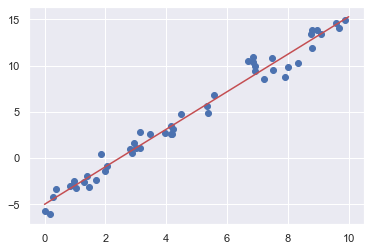

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) # 一般採用預設參數設置，可根據自己實際要求設置參數
model.fit(x[:, np.newaxis], y) # 訓練

xfit = np.linspace(0, 10, 1000)  # 繪圖用的x軸座標
y_pred = model.predict(xfit[:, np.newaxis])  # 使用 x軸座標值 預測 y 值

plt.scatter(x, y)
plt.plot(xfit, y_pred, 'r');    # 用紅線標示

In [92]:
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [2.02720881]
Model intercept: -4.9985770855532055


In [93]:
#Example for multiple linear regression
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
print(y.shape)
# Constructing Linear Regressin Model
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

(100,)
0.5000000000000091
[ 1.5 -2.   1. ]


## Use practical dataset (Boston Housing Price)

In [9]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston dataset from datasets library 

In [10]:
datasets.load_*?

In [11]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


### data： 每個房子的資訊
### target： 每個房子的價格
### feature_names： 每個房子的特徵
### DESCR： 這個資料集的描述

In [98]:
data.feature_names  #independent variables

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [99]:
data.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [100]:
data.target  #dependent variable

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [13]:
# define the data/predictors as the pre-set feature names
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


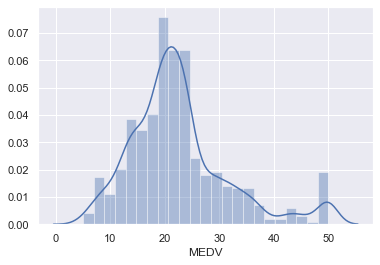

In [15]:
import seaborn as sns
# 用seaborne 觀看房價分佈，使用的資料是房價MEDIV
sns.distplot(target["MEDV"])
plt.show()

# Linear Regression in SKLearn

In [16]:
df.shape

(506, 13)

In [17]:
# 先確認是否有缺失值
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [19]:
X =pd.DataFrame(df['RM'])
y = target

In [23]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions[0:5])

[[25.17574577]
 [23.77402099]
 [30.72803225]
 [29.02593787]
 [30.38215211]]


In [24]:
lm.score(X,y)  # R² score of the trained model (SSR(mean)-SSR(fit))/SSR(mean)

0.4835254559913343

In [25]:
print(lm.coef_)
print(lm.intercept_)

[[9.10210898]]
[-34.67062078]


## For multiple factors


In [26]:
X = df
y = target
df.shape

(506, 13)

In [28]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions[0:5])

[[30.00384338]
 [25.02556238]
 [30.56759672]
 [28.60703649]
 [27.94352423]]


In [29]:
lm.score(X,y) 

0.7406426641094095

In [30]:
print(lm.coef_)
print(lm.intercept_)

[[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]
[36.45948839]


## Drill Practice 
## Try to pick up two independent variables to construct the MLR model and analyze the result!
## What's your suggestion?


In [31]:
# Example of picking CRIM and ZN factors: 
X = df[['ZN','CRIM']]
y = target['MEDV']

In [32]:
X.shape

(506, 2)

In [34]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions[0:5])

[24.57336663 22.47601285 22.4760199  22.47423134 22.46131711]


In [35]:
lm.score(X,y) 

0.23398843834155303

In [36]:
X=df
print(X.shape)
X.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
X.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [59]:
corr = X.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1,-0.200469,0.406583,-0.0558916,0.420972,-0.219247,0.352734,-0.37967,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1,-0.533828,-0.0426967,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.17552,-0.412995
INDUS,0.406583,-0.533828,1,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.72076,0.383248,-0.356977,0.6038
CHAS,-0.0558916,-0.0426967,0.062938,1,0.0912028,0.0912512,0.0865178,-0.0991758,-0.00736824,-0.0355865,-0.121515,0.0487885,-0.0539293
NOX,0.420972,-0.516604,0.763651,0.0912028,1,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.0912512,-0.302188,1,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.0865178,0.73147,-0.240265,1,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.37967,0.664408,-0.708027,-0.0991758,-0.76923,0.205246,-0.747881,1,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.00736824,0.611441,-0.209847,0.456022,-0.494588,1,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.72076,-0.0355865,0.668023,-0.292048,0.506456,-0.534432,0.910228,1,0.460853,-0.441808,0.543993


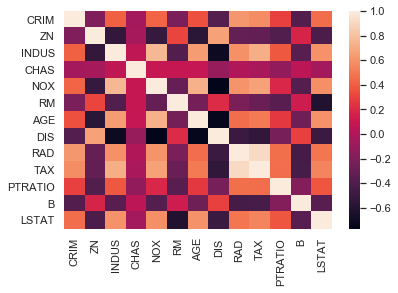

In [38]:
import seaborn as sns
corr = X.corr(method='pearson')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [39]:
X_new=df
X_new['Target']=y

In [40]:
X_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
X_new.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [42]:
# Example of picking CRIM and ZN factors: 
X = df[['CRIM','ZN']]
y = target['MEDV']

In [43]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
lm.score(X,y) 

0.23398843834155303

In [45]:
# Example of picking RM and LSTAT factors: Why choose these two factors?? 
X = df[['RM','LSTAT']]
y = target['MEDV']
m = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
lm.score(X,y)

0.6385616062603403

## Logistic Regression Example  (Use iris dataset)
## https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

In [48]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [49]:
y.shape

(150,)

In [50]:
clf = LogisticRegression(random_state=0, solver='sag',multi_class='multinomial')
clf=clf.fit(X,y)
clf.classes_

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([0, 1, 2])

In [51]:
clf.coef_

array([[ 0.61882374,  1.61956745, -2.36973754, -1.10174388],
       [ 0.37397659, -0.28872847, -0.03389596, -0.95622952],
       [-0.99280033, -1.33083898,  2.4036335 ,  2.0579734 ]])

In [52]:
clf.intercept_

array([ 1.41341676,  1.98582553, -3.39924229])

In [53]:
clf.score(X, y)

0.9866666666666667

In [54]:
clf.predict(X[48:52, :])

array([0, 0, 1, 1])

In [55]:
clf.predict_proba(X[48:52, :])

array([[9.85979373e-01, 1.40205582e-02, 6.87430502e-08],
       [9.74665163e-01, 2.53346140e-02, 2.22548907e-07],
       [1.78981741e-02, 9.14892048e-01, 6.72097781e-02],
       [2.27963293e-02, 8.58338298e-01, 1.18865372e-01]])

In [58]:
clf.predict([[4.7, 3.2, 1.3, 0.2], [6.3, 3.3, 6. , 2.5]])

array([0, 2])

In [56]:
X[51]

array([6.4, 3.2, 4.5, 1.5])

In [57]:
clf.predict([[4.7, 3.2, 1.3, 0.2], [6.3, 3.3, 4.4 , 1.5]])

array([0, 1])